In [1]:
import numpy as np
import pandas as pd
from dowhy import CausalModel
import graphviz
import warnings
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
# EconML imports
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')



G=graphviz.Digraph()
G.edge("CDD_category" , "IECC_CLIMATE")
G.edge("CDD_category" , "WSF")
G.edge("CDD_category" , "COOLTYPE")
G.edge("CDD_category" , "THERMAIN")
G.edge("CDD_category" , "Gone_vs_Night")
G.edge("CDD_category" , "USECENAC")
G.edge("CDD_category" , "ROOFTYPE")
G.edge("CDD_category" , "WALLTYPE")
G.edge("CDD_category" , "WINDOWS")
G.edge("CDD_category" , "OA_LAT")
G.edge("CDD_category" , "ADQINSUL")
G.edge("CDD_category" , "ESWIN")
G.edge("CDD_category" , "SMARTMETER")
G.edge("CDD_category" , "INTDATA")
G.edge("CDD_category" , "SOLOTHER")
G.edge("CDD_category" , "EUI")


G.edge("IECC_CLIMATE" , "WSF")
G.edge("IECC_CLIMATE" , "COOLTYPE")
G.edge("IECC_CLIMATE" , "THERMAIN")
G.edge("IECC_CLIMATE" , "Home_vs_Night")
G.edge("IECC_CLIMATE" , "Gone_vs_Night")
G.edge("IECC_CLIMATE" , "USECENAC")
G.edge("IECC_CLIMATE" , "ROOFTYPE")
G.edge("IECC_CLIMATE" , "WALLTYPE")
G.edge("IECC_CLIMATE" , "WINDOWS")
G.edge("IECC_CLIMATE" , "OA_LAT")
G.edge("IECC_CLIMATE" , "ADQINSUL")
G.edge("IECC_CLIMATE" , "AUDIT")
G.edge("IECC_CLIMATE" , "ESWIN")
G.edge("IECC_CLIMATE" , "SMARTMETER")
G.edge("IECC_CLIMATE" , "INTDATA")
G.edge("IECC_CLIMATE" , "SOLOTHER")
G.edge("IECC_CLIMATE" , "EUI")

G.edge("WINDOWS" , "WSF")
G.edge("TOTAREA" , "WSF")
G.edge("WSF" , "OA_LAT")
G.edge("ESWIN" , "WSF")
G.edge("WSF" , "EUI")

G.edge("NHSLDMEM_category" , "Income_category")
G.edge("NHSLDMEM_category" , "COOLTYPE")
G.edge("NHSLDMEM_category" , "Home_vs_Night")
G.edge("NHSLDMEM_category" , "WINDOWS")
G.edge("NHSLDMEM_category" , "TOTROOMS")
G.edge("NHSLDMEM_category" , "TOTAREA")
G.edge("NHSLDMEM_category" , "TOTCAREA")
G.edge("NHSLDMEM_category" , "ENERGYASST")
G.edge("NHSLDMEM_category" , "EUI")

G.edge("Income_category" , "COOLTYPE")
G.edge("Income_category" , "THERMAIN")
G.edge("Income_category" , "Home_vs_Night")
G.edge("Income_category" , "Gone_vs_Night")
G.edge("Income_category" , "USECENAC")
G.edge("Income_category" , "TYPEHUQ")
G.edge("Income_category" , "ROOFTYPE")
G.edge("Income_category" , "WALLTYPE")
G.edge("Income_category" , "WINDOWS")
G.edge("Income_category" , "YEARMADERANGE")
G.edge("Income_category" , "TOTROOMS")
G.edge("Income_category" , "TOTAREA")
G.edge("Income_category" , "TOTCAREA")
G.edge("Income_category" , "ADQINSUL")
G.edge("Income_category" , "AUDIT")
G.edge("Income_category" , "ESWIN")
G.edge("Income_category" , "ELPAY")
G.edge("Income_category" , "SMARTMETER")
G.edge("Income_category" , "ENERGYASST")
G.edge("Income_category" , "SOLOTHER")
G.edge("Income_category" , "EUI")

##################
G.edge("COOLTYPE" , "THERMAIN")
G.edge("COOLTYPE" , "Home_vs_Night")
G.edge("COOLTYPE" , "Gone_vs_Night")
G.edge("TYPEHUQ" , "COOLTYPE")
G.edge("YEARMADERANGE" , "COOLTYPE")
G.edge("TOTROOMS" , "COOLTYPE")
G.edge("TOTAREA" , "COOLTYPE")
G.edge("TOTCAREA" , "COOLTYPE")
G.edge("COOLTYPE" , "ESWIN")
G.edge("COOLTYPE" , "SMARTMETER")
G.edge("COOLTYPE" , "INTDATA")
G.edge("COOLTYPE" , "ENERGYASST")
G.edge("COOLTYPE" , "EUI")
#######################
G.edge("AGECENAC_category" , "THERMAIN")
G.edge("AGECENAC_category" , "YEARMADERANGE")
G.edge("AGECENAC_category" , "TOTROOMS")
G.edge("AGECENAC_category" , "ESWIN")

########################
G.edge("THERMAIN" , "Home_vs_Night")
G.edge("THERMAIN" , "Gone_vs_Night")
G.edge("THERMAIN" , "USECENAC")
G.edge("TYPEHUQ" , "THERMAIN")
G.edge("YEARMADERANGE" , "THERMAIN")
G.edge("TOTROOMS" , "THERMAIN")
G.edge("TOTAREA" , "THERMAIN")
G.edge("TOTCAREA" , "THERMAIN")
G.edge("THERMAIN" , "AUDIT")
G.edge("THERMAIN" , "ESWIN")
G.edge("THERMAIN" , "SMARTMETER")
G.edge("THERMAIN" , "INTDATA")
G.edge("THERMAIN" , "EUI")
###########################

G.edge("USECENAC" , "Home_vs_Night")
G.edge("TYPEHUQ" , "Home_vs_Night")
G.edge("WINDOWS" , "Home_vs_Night")
G.edge("TOTROOMS" , "Home_vs_Night")
G.edge("TOTCAREA" , "Home_vs_Night")
G.edge("ESWIN" , "Home_vs_Night")
G.edge("ELPAY" , "Home_vs_Night")
G.edge("SMARTMETER" , "Home_vs_Night")
G.edge("INTDATA" , "Home_vs_Night")
G.edge("ENERGYASST" , "Home_vs_Night")
G.edge("SOLOTHER" , "Home_vs_Night")
G.edge("Home_vs_Night" , "EUI")
###########################

G.edge("USECENAC" , "Gone_vs_Night")
G.edge("TYPEHUQ" , "Gone_vs_Night")
G.edge("WINDOWS" , "Gone_vs_Night")
G.edge("TOTROOMS" , "Gone_vs_Night")
G.edge("TOTAREA" , "Gone_vs_Night")
G.edge("TOTCAREA" , "Gone_vs_Night")
G.edge("OA_LAT" , "Gone_vs_Night")
G.edge("ESWIN" , "Gone_vs_Night")
G.edge("INTDATA" , "Gone_vs_Night")
G.edge("ENERGYASST" , "Gone_vs_Night")
G.edge("SOLOTHER" , "Gone_vs_Night")
G.edge("Gone_vs_Night" , "EUI")

########################

G.edge("TYPEHUQ" , "USECENAC")
G.edge("WINDOWS" , "USECENAC")
G.edge("YEARMADERANGE" , "USECENAC")
G.edge("TOTROOMS" , "USECENAC")
G.edge("TOTAREA" , "USECENAC")
G.edge("TOTCAREA" , "USECENAC")
G.edge("OA_LAT" , "USECENAC")
G.edge("AUDIT" , "USECENAC")
G.edge ("ESWIN" , "USECENAC")
G.edge("ELPAY" , "USECENAC")
G.edge("SMARTMETER" , "USECENAC")
G.edge("INTDATA" , "USECENAC")
G.edge("ENERGYASST" , "USECENAC")
G.edge("USECENAC" , "EUI")

#######################

G.edge("TYPEHUQ" , "ROOFTYPE")
G.edge("TYPEHUQ" , "WALLTYPE")
G.edge("TYPEHUQ" , "TOTROOMS")
G.edge("TYPEHUQ" , "TOTAREA")
G.edge("TYPEHUQ" , "TOTCAREA")
G.edge("TYPEHUQ" , "OA_LAT")
G.edge("TYPEHUQ" , "ADQINSUL")
G.edge("TYPEHUQ" , "AUDIT"),
G.edge("TYPEHUQ" , "ESWIN")
G.edge("TYPEHUQ" , "ELPAY")
G.edge("TYPEHUQ" , "SMARTMETER")
G.edge("TYPEHUQ" , "INTDATA")
G.edge("TYPEHUQ" , "ENERGYASST")
G.edge("TYPEHUQ" , "SOLOTHER")
G.edge("TYPEHUQ" , "EUI")

#######################
G.edge("YEARMADERANGE" , "ROOFTYPE")
G.edge("ROOFTYPE" , "OA_LAT")
G.edge("ROOFTYPE" , "ADQINSUL")
G.edge("ROOFTYPE" , "EUI")

#######################
G.edge("YEARMADERANGE" , "WALLTYPE")
G.edge("WALLTYPE" , "OA_LAT")
G.edge("WALLTYPE" , "ADQINSUL")
G.edge("WALLTYPE" , "EUI")
######################

G.edge("TOTROOMS" , "WINDOWS")
G.edge("TOTAREA" , "WINDOWS")
G.edge("TOTCAREA" , "WINDOWS")
G.edge("WINDOWS" , "ADQINSUL")
G.edge("WINDOWS" , "ESWIN")
G.edge("WINDOWS" , "EUI")

#########################

G.edge("YEARMADERANGE" , "OA_LAT")
G.edge("YEARMADERANGE" , "ADQINSUL")
G.edge("YEARMADERANGE" , "AUDIT")
G.edge("YEARMADERANGE" , "ESWIN")
G.edge("YEARMADERANGE" , "SMARTMETER")
G.edge("YEARMADERANGE" , "EUI")

############################

G.edge("TOTAREA" , "TOTROOMS")
G.edge("TOTROOMS" , "TOTCAREA")
G.edge("TOTROOMS" , "AUDIT")
G.edge("TOTROOMS" , "ESWIN")
G.edge("TOTROOMS" , "ENERGYASST")
G.edge("TOTROOMS" , "SOLOTHER")
G.edge("TOTROOMS" , "EUI")

#########################

G.edge("TOTAREA" , "TOTCAREA")
G.edge("TOTAREA" , "AUDIT")
G.edge("TOTAREA" , "ESWIN")
G.edge("TOTAREA" , "SMARTMETER")
G.edge("TOTAREA" , "INTDATA")
G.edge("TOTAREA" , "ENERGYASST")
G.edge("TOTAREA" , "EUI")

######################

G.edge("TOTCAREA" , "AUDIT")
G.edge("TOTCAREA" , "ESWIN")
G.edge("TOTCAREA" , "SMARTMETER")
G.edge("TOTCAREA" , "INTDATA")
G.edge("TOTCAREA" , "ENERGYASST")
G.edge("TOTCAREA" , "SOLOTHER")
G.edge("TOTCAREA" , "EUI")

##################

G.edge("OA_LAT" , "EUI")

#######################

G.edge("ESWIN" , "ADQINSUL")
G.edge("ADQINSUL" , "EUI")

###########################

G.edge("AUDIT" , "ESWIN")
G.edge("AUDIT" , "SMARTMETER")
G.edge("AUDIT" , "INTDATA")
G.edge("AUDIT" , "ENERGYASST")
G.edge("AUDIT" , "SOLOTHER")
G.edge("AUDIT" , "EUI")
############################

G.edge("ESWIN" , "SMARTMETER")
G.edge("ESWIN" , "INTDATA")
G.edge("ESWIN" , "ENERGYASST")
G.edge("ESWIN" , "EUI")

####################
G.edge("ELPAY" , "SMARTMETER")
G.edge("ELPAY" , "INTDATA")
G.edge("ELPAY" , "SOLOTHER")
G.edge("ELPAY" , "EUI")

#########################
G.edge("SMARTMETER" , "INTDATA")
G.edge("SOLOTHER" , "SMARTMETER")
G.edge("SMARTMETER" , "EUI")

########################

G.edge("INTDATA" , "EUI")

####################

G.edge("ENERGYASST" , "SOLOTHER")
G.edge("ENERGYASST" , "EUI")
#########################
#########################################

# print(dot.source)

G.format = 'pdf'
G.render(directory='DAG', view = False).replace('\\', '/')



'DAG/Digraph.gv.pdf'

In [2]:
data = pd.read_excel("data.xlsx")

In [3]:
data.columns

Index(['CDD65', 'DBT', 'IECC_CLIMATE', 'WSF', 'HHAGE', 'MONEYPY', 'NHSLDMEM',
       'COOLTYPE', 'AGECENAC', 'WWACAGE', 'NUMBERAC', 'TYPEHUQ', 'ATTIC',
       'ATTICFIN', 'PRKGPLC1', 'STUDIO', 'WALLTYPE', 'ROOFTYPE', 'WINDOWS',
       'YEARMADERANGE', 'TOTROOMS', 'TOTAREA', 'TOTCAREA', 'CELLAR', 'STORIES',
       'OA_LAT', 'ADQINSUL', 'ATTCCOOL', 'BASECOOL', 'TEMPHOMEAC',
       'TEMPGONEAC', 'TEMPNITEAC', 'USECENAC', 'USEWWAC', 'SOLAR', 'THERMAIN',
       'PROTHERM', 'AUDIT', 'AUDITCHG', 'ESWIN', 'SMARTTHERM', 'ELPAY',
       'SMARTMETER', 'INTDATA', 'ENERGYASST', 'SOLOTHER', 'KWHCOL', 'EUI',
       'TEMPNITEAC-TEMPHOMEAC', 'TEMPNITEAC-TEMPGONEAC', 'Home_vs_Night',
       'Gone_vs_Night', 'CDD_category', 'Income_category', 'NHSLDMEM_category',
       'AGECENAC_category', 'WWACAGE_category'],
      dtype='object')

In [4]:
data_for_causal = data[['CDD_category','IECC_CLIMATE','WSF','NHSLDMEM_category','Income_category','COOLTYPE','AGECENAC_category','THERMAIN','Home_vs_Night','Gone_vs_Night','USECENAC','TYPEHUQ','ROOFTYPE',
                        'WALLTYPE','WINDOWS','YEARMADERANGE','TOTROOMS','TOTAREA','TOTCAREA','OA_LAT','ADQINSUL','AUDIT','ESWIN','ELPAY','SMARTMETER','INTDATA','ENERGYASST','SOLOTHER','EUI']]

In [5]:
WSF = data_for_causal.copy()

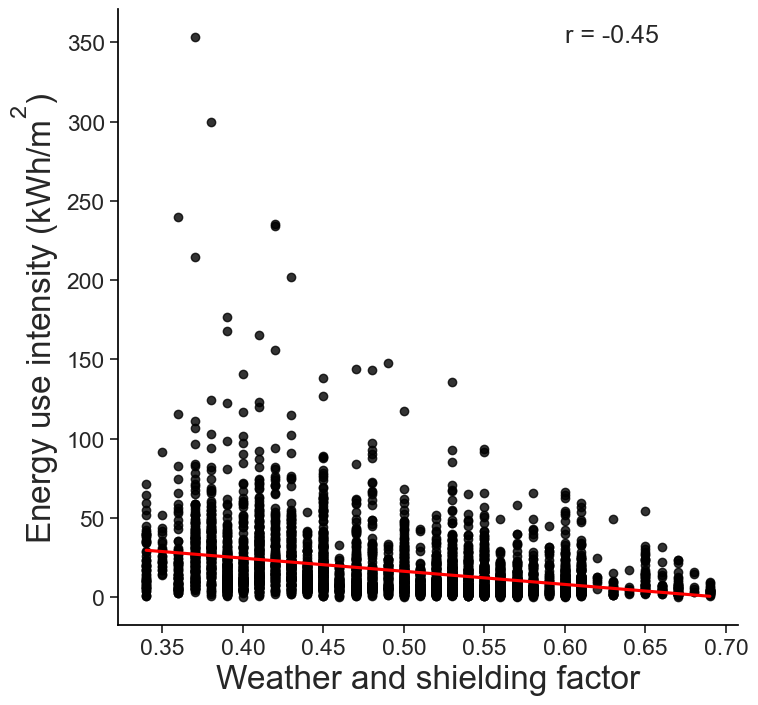

In [6]:
from scipy import stats
plt.figure(figsize=(8,8))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, font_scale=1.5)
plt.rcParams["axes.edgecolor"] = "black"
# draw = sns.violinplot(x = temp['IECC_CLIMATE'], y = temp['KWHCOL'], hue=temp['TEMP_CHANGE'])
draw = sns.regplot(x = WSF['WSF'], y = WSF['EUI'], scatter_kws={"color": "black"}, line_kws={"color": "red"}, ci = None)
draw.set_xlabel("Weather and shielding factor",fontsize=24)
draw.set_ylabel("Energy use intensity (kWh/$\mathregular{m^2}$)",fontsize=24)
r = stats.spearmanr(data_for_causal['WSF'], data_for_causal['EUI'])[0]
plt.annotate("r = {:.2f}".format(r), (0.6, 350))


# draw.set(ylim=(0, 25000))
figure = draw.get_figure()
figure.savefig('WSF.png', bbox_inches='tight', dpi=300)

In [7]:
# data.groupby(['CDD_category'])['EUI'].median()

In [8]:
# Initializing causal model
model = CausalModel(data=WSF,
                     graph=G.source.replace("\t", ' ').replace("\n", ' '),
                     treatment="WSF",
                     outcome="EUI")

# Identifying the estimation method
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                           
──────(E[EUI|WINDOWS,TOTAREA,CDD_category,ESWIN,IECC_CLIMATE])
d[WSF]                                                        
Estimand assumption 1, Unconfoundedness: If U→{WSF} and U→EUI then P(EUI|WSF,WINDOWS,TOTAREA,CDD_category,ESWIN,IECC_CLIMATE,U) = P(EUI|WSF,WINDOWS,TOTAREA,CDD_category,ESWIN,IECC_CLIMATE)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [9]:
random_state = 120
dml_estimate = model.estimate_effect(identified_estimand,
                                     method_name="backdoor.econml.dml.DML",
                                     control_value = 0.3,
                                     treatment_value = 0.4,
                                     target_units = 'ate',
                                     confidence_intervals=False,
                                method_params={"init_params":{'model_y':GradientBoostingRegressor(random_state=random_state, learning_rate=0.0001),
                                                              'model_t': GradientBoostingRegressor(random_state=random_state, learning_rate=0.0001),
                                                              "model_final":LassoCV(fit_intercept=False, random_state=random_state),
                                                              'featurizer':PolynomialFeatures(degree=1, include_bias=True),
                                                              'random_state':random_state},
                                               "fit_params":{}})
print(dml_estimate.value)

-8.116243735131205


In [10]:
# dml_estimate.test_stat_significance()

In [11]:
# Random cause
res_random=model.refute_estimate(identified_estimand, dml_estimate, method_name="random_common_cause", random_seed=123)
print(res_random)

# Add Unobserved Common Causes
res_unobserved=model.refute_estimate(identified_estimand, dml_estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="linear", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02, random_seed=123)
print(res_unobserved)

# Placebo Treatment
res_placebo=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="placebo_treatment_refuter", random_seed=123)
print(res_placebo)


# Data Subsets Validation
res_subset=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="data_subset_refuter", subset_fraction=0.8,
        num_simulations=10, random_seed=123)
print(res_subset)

# # Boostrap Validation
# res_bootstrap=model.refute_estimate(identified_estimand, dml_estimate,
#         method_name="bootstrap_refuter", random_seed=123)
# print(res_bootstrap)

Refute: Add a random common cause
Estimated effect:-8.116243735131205
New effect:-8.116310635987306
p value:0.18999999999999995

Refute: Add an Unobserved Common Cause
Estimated effect:-8.116243735131205
New effect:-8.009322338447351

Refute: Use a Placebo Treatment
Estimated effect:-8.116243735131205
New effect:0.0
p value:1.0

Refute: Use a subset of data
Estimated effect:-8.116243735131205
New effect:-8.108134982574677
p value:0.4849282395312105

